In [17]:
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import yfinance as yf

### 1. In this notebook, I have tried to implement the mean reversion trading strategy
### 2. If the time series value is far from mean in the positive side, go short otherwise go long


In [2]:
# Plotiing packages
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [61]:
df_gld = pd.DataFrame(yf.download('GLD', start = '2016-01-01', end='2021-01-01')['Close'])

[*********************100%***********************]  1 of 1 completed


In [62]:
# moving average of 4 weeks
ma = 20
df_gld['log_values'] = np.log(df_gld['Close'])
df_gld['log_returns'] = np.log(df_gld['Close']).diff()
df_gld['close_ma'] = df_gld['Close'].rolling(ma).mean()
df_gld['ratio'] = df_gld['Close']/ df_gld['close_ma']

In [63]:
df_gld['ratio'].describe()

count    1241.000000
mean        1.004010
std         0.020939
min         0.916004
25%         0.991113
50%         1.002522
75%         1.016469
max         1.096973
Name: ratio, dtype: float64

In [64]:
# check percentiles range
percentiles = [5, 10, 50, 90, 95]
dt_p = np.percentile(df_gld['ratio'].dropna(), percentiles)

In [65]:
dt_p

array([0.97185478, 0.9793621 , 1.00252192, 1.02832319, 1.03841179])

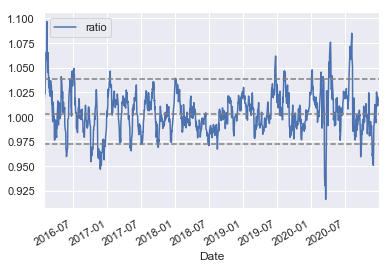

In [66]:
df_gld['ratio'].dropna().plot(legend=True)
# if it is in the range of nearby of 1 and cylical in natur implies that ratio is flucating near 1 and goes back to 1 if it goes higher than 1 and vice versa
plt.axhline(dt_p[2], c = (0.5, 0.5, 0.5), ls = '--')
plt.axhline(dt_p[-1], c = (0.5, 0.5, 0.5), ls = '--')
plt.axhline(dt_p[0], c = (0.5, 0.5, 0.5), ls = '--')
# percentile checks to obtain range bound visually

In [67]:
short_ratio = dt_p[-1]
long_ratio = dt_p[0]

In [74]:
# define what to do when
df_gld['position'] = np.where(df_gld.ratio > short_ratio, -1, np.nan)
df_gld['position'] = np.where(df_gld.ratio < long_ratio, 1, df_gld['position'])
df_gld['position'] = df_gld['position'].ffill()

# implies keep on doing the same thing until the next switch

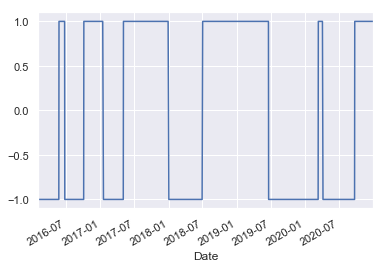

In [76]:
df_gld['position'].dropna().plot()